# Auto Insurance Case Study: Claims Risk Assessment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from clean_eda_helper import na_replace, new_feats, na_replace_2017, show_values,\
new_feat_2018, label_encode_2017, label_encode_2018, std_num_cols
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Case Study Data Investigation:

### Loading 2017 auto policies data:

- This data set is a set of personal auto insurance policies taken out in 2017. There are 60,392 policies (rows), of which 10,030 had at least one claim. 

In [2]:
auto_policies_2017 = pd.read_csv("auto_policies_2017.csv")

- Checking dataset shape:

In [3]:
print('Shape of auto_policies_2017 :',auto_policies_2017.shape)

Shape of auto_policies_2017 : (60392, 15)


- Looking at first few rows:

In [4]:
auto_policies_2017.columns

Index(['pol_number', 'pol_eff_dt', 'gender', 'agecat', 'date_of_birth',
       'credit_score', 'area', 'traffic_index', 'veh_age', 'veh_body',
       'veh_value', 'claim_office', 'numclaims', 'claimcst0',
       'annual_premium'],
      dtype='object')

- Renamed few columns for clarity and future analysis:

In [5]:
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("agecat","age_category")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("numclaims","num_claims")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("claimcst0","claim_amount")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_age","vehicle_age")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_body","vehicle_body")
auto_policies_2017.columns = auto_policies_2017.columns.str.replace("veh_value","vehicle_value")

### Loading auto policies potential customers 2018 data:

- This is a list of 7,464 potential customers for 2018.  

In [6]:
auto_potential_2018 = pd.read_csv("auto_potential_customers_2018.csv")

- Checking dataset shape:

In [7]:
print('Shape of auto_potential_2018 :',auto_potential_2018.shape)

Shape of auto_potential_2018 : (7464, 10)


- Looking at first few rows:

In [8]:
auto_potential_2018.columns

Index(['quote_number', 'gender', 'agecat', 'date_of_birth', 'credit_score',
       'area', 'traffic_index', 'veh_age', 'veh_body', 'veh_value'],
      dtype='object')

- Renamed few columns for clarity and future analysis:

In [9]:
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("agecat","age_category")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_age","vehicle_age")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_body","vehicle_body")
auto_potential_2018.columns = auto_potential_2018.columns.str.replace("veh_value","vehicle_value")

### Looking at column info in detail:

In [10]:
auto_policies_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   age_category    55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   vehicle_age     60392 non-null  int64  
 9   vehicle_body    60392 non-null  object 
 10  vehicle_value   60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  num_claims      60392 non-null  int64  
 13  claim_amount    60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


In [11]:
auto_policies_2017.describe()

,pol_number,age_category,credit_score,traffic_index,vehicle_age,vehicle_value,num_claims,claim_amount,annual_premium
count,6.039200e+04,55561.000000,57591.000000,56889.000000,60392.000000,60392.000000,60392.000000,60392.000000,6.039200e+04
mean,5.499204e+07,3.488310,662.193190,103.892536,2.673748,1.956051,0.214250,644.875932,7.165300e+02
std,2.587003e+07,1.425133,136.450182,33.688679,1.068058,1.330279,0.552291,3354.631809,6.165288e-10
min,1.000040e+07,1.000000,301.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.165300e+02
25%,3.280473e+07,2.000000,602.000000,80.300000,2.000000,1.111000,0.000000,0.000000,7.165300e+02
50%,5.500180e+07,3.000000,682.000000,108.300000,3.000000,1.650000,0.000000,0.000000,7.165300e+02
75%,7.729614e+07,5.000000,772.000000,132.000000,4.000000,2.365000,0.000000,0.000000,7.165300e+02
max,9.999838e+07,6.000000,850.000000,207.000000,4.000000,38.016000,5.000000,69478.897830,7.165300e+02


In [12]:
auto_potential_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quote_number   7464 non-null   int64  
 1   gender         7464 non-null   object 
 2   age_category   6832 non-null   float64
 3   date_of_birth  7464 non-null   object 
 4   credit_score   7109 non-null   float64
 5   area           7464 non-null   object 
 6   traffic_index  7015 non-null   float64
 7   vehicle_age    7464 non-null   int64  
 8   vehicle_body   7464 non-null   object 
 9   vehicle_value  7464 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 583.2+ KB


In [13]:
auto_potential_2018.describe()

,quote_number,age_category,credit_score,traffic_index,vehicle_age,vehicle_value
count,7.464000e+03,6832.000000,7109.000000,7015.000000,7464.000000,7464.000000
mean,5.504566e+07,3.470433,661.321846,104.416636,2.671758,1.943977
std,2.605332e+07,1.429760,135.368887,33.919748,1.063432,1.288601
min,1.000528e+07,1.000000,301.000000,0.000000,1.000000,0.000000
25%,3.238049e+07,2.000000,600.000000,81.000000,2.000000,1.111000
50%,5.505358e+07,3.000000,680.000000,109.100000,3.000000,1.639000
75%,7.788507e+07,5.000000,769.000000,133.050000,4.000000,2.354000
max,9.997137e+07,6.000000,850.000000,223.700000,4.000000,18.700000


### Looking at duplicate values if any:

In [14]:
auto_policies_2017.duplicated().sum()

0

In [15]:
auto_potential_2018.duplicated().sum()

0

### Creating new features in current 2017 policies and 2018 potential data that can be useful for data evaluation:

In [16]:
new_feats(auto_policies_2017)
new_feat_2018(auto_potential_2018)

### Checking and imputing null values:-

- 2017 Policies Data

In [17]:
policies2017_null_counts = auto_policies_2017.isnull().sum()
policies2017_null_counts[policies2017_null_counts > 0]

age_category       4831
credit_score       2801
traffic_index      3503
claim_office      50362
cost_per_claim    50362
dtype: int64

<AxesSubplot:>

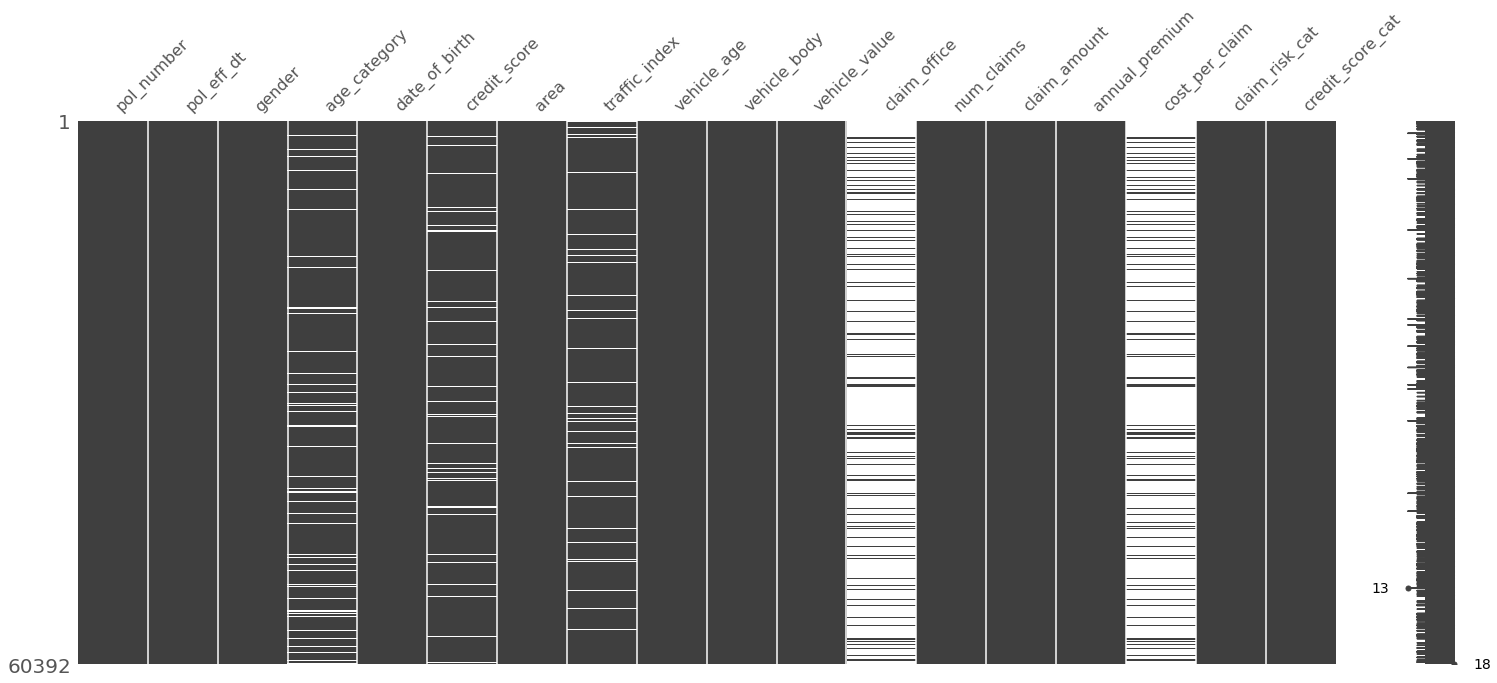

In [18]:
msno.matrix(auto_policies_2017)

- Dropping claim_office column which has high null values

In [19]:
auto_policies_2017.drop(['claim_office'], axis=1, inplace=True)

- 2018 Potential customer data

In [20]:
potential2018_null_counts = auto_potential_2018.isnull().sum()
potential2018_null_counts[potential2018_null_counts > 0]

age_category     632
credit_score     355
traffic_index    449
dtype: int64

<AxesSubplot:>

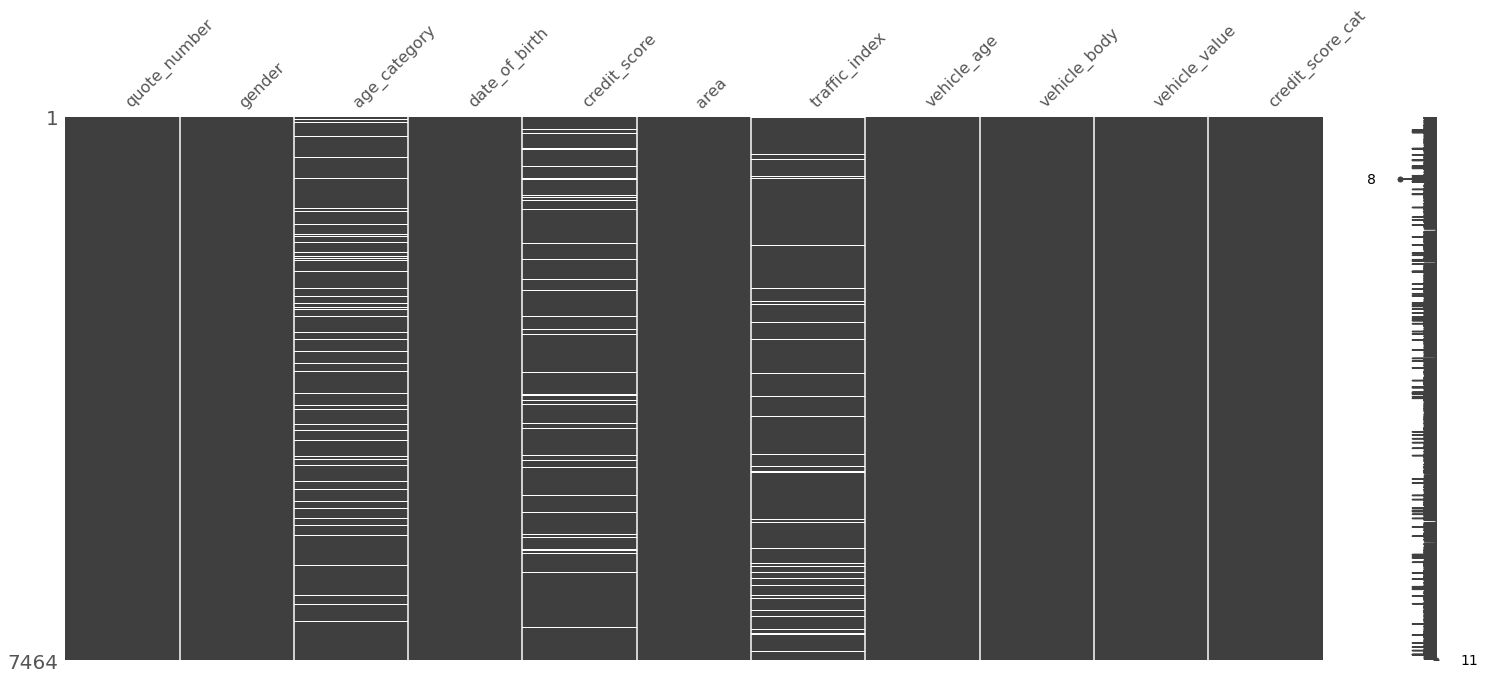

In [21]:
msno.matrix(auto_potential_2018)

#### Imputing null values for both datasets

- age_category: Null values imputed by most common age category

- traffic_index: Null values imputed by median area traffic index

- credit_score: Null values imputed by median credit score grouped by age

In [22]:
na_replace(auto_policies_2017)
na_replace_2017(auto_policies_2017)
na_replace(auto_potential_2018)

- Checking null value counts

In [23]:
policies2017_null_counts = auto_policies_2017.isnull().sum()
policies2017_null_counts[policies2017_null_counts > 0]

Series([], dtype: int64)

In [24]:
potential2018_null_counts = auto_potential_2018.isnull().sum()
potential2018_null_counts[potential2018_null_counts > 0]

Series([], dtype: int64)

### Dropping columns that will not be used for the study:

- Current 2017 policies

In [25]:
auto_policies_2017.drop(['pol_eff_dt', 'date_of_birth'], axis=1, inplace=True)

- Potential 2018 policies

In [26]:
auto_potential_2018.drop(['date_of_birth'], axis=1, inplace=True)

### Outlier evaluation

- 2017 Auto policies dataset

<AxesSubplot:>

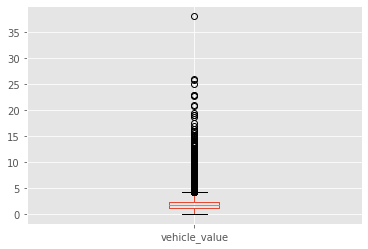

In [27]:
auto_policies_2017[['vehicle_value']].boxplot()

In [28]:
auto_policies_2017.loc[auto_policies_2017.vehicle_value > 35,:]

,pol_number,gender,age_category,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value,num_claims,claim_amount,annual_premium,cost_per_claim,claim_risk_cat,credit_score_cat
22823,21734593,M,4.0,616.0,A,89.2,1,CONVT,38.016,0,0.0,716.53,0.0,low_risk,Poor


<AxesSubplot:>

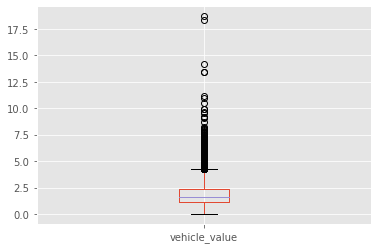

In [29]:
auto_potential_2018[['vehicle_value']].boxplot()

In [30]:
auto_potential_2018.loc[auto_potential_2018.vehicle_value > 17.5,:]

,quote_number,gender,age_category,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value,credit_score_cat
146,96313099,M,1.0,344.0,C,93.0,1,SEDAN,18.359,Bad
5448,15575021,F,6.0,749.0,D,102.7,1,MCARA,18.700,Good


<AxesSubplot:>

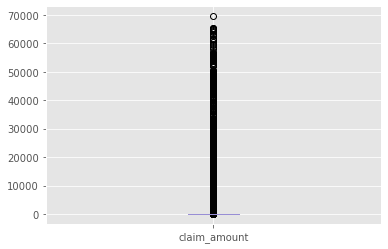

In [31]:
auto_policies_2017[['claim_amount']].boxplot()

In [32]:
auto_policies_2017.loc[auto_policies_2017.claim_amount > 65000,:]

,pol_number,gender,age_category,credit_score,area,traffic_index,vehicle_age,vehicle_body,vehicle_value,num_claims,claim_amount,annual_premium,cost_per_claim,claim_risk_cat,credit_score_cat
8357,35714959,M,6.0,310.0,D,100.3,1,UTE,4.147,1,65085.35299,716.53,65085.352990,high_risk,Bad
10004,89380626,M,5.0,492.0,D,78.5,1,SEDAN,2.893,3,65309.89674,716.53,21769.965580,high_risk,Bad
13697,72197352,M,2.0,411.0,E,43.5,1,COUPE,3.267,1,65306.53615,716.53,65306.536150,high_risk,Bad
43367,70962517,M,5.0,413.0,D,159.7,1,SEDAN,2.299,2,69478.89783,716.53,34739.448915,high_risk,Bad
55019,43032147,M,6.0,335.0,B,126.7,1,STNWG,3.201,3,65070.33642,716.53,21690.112140,high_risk,Bad


- Removing certain outliers from both datasets

In [33]:
auto_potential_2018 = auto_potential_2018.drop(auto_potential_2018.index[[146, 5448]])
auto_policies_2017 = auto_policies_2017.drop(auto_policies_2017.index[[22823, 8357, 10004, 13697, 43367, 55019]])

### Correlation matrix

<AxesSubplot:>

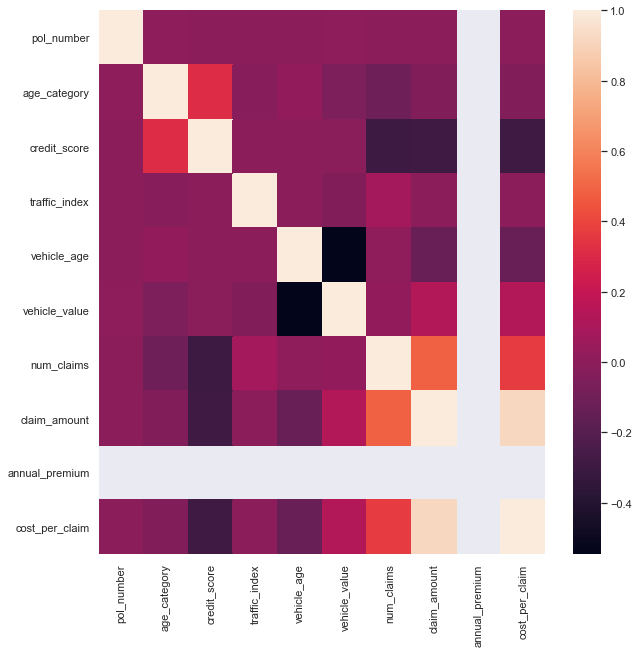

In [34]:
# plt.figure(figsize=(20, 20))
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(auto_policies_2017.corr())

<AxesSubplot:>

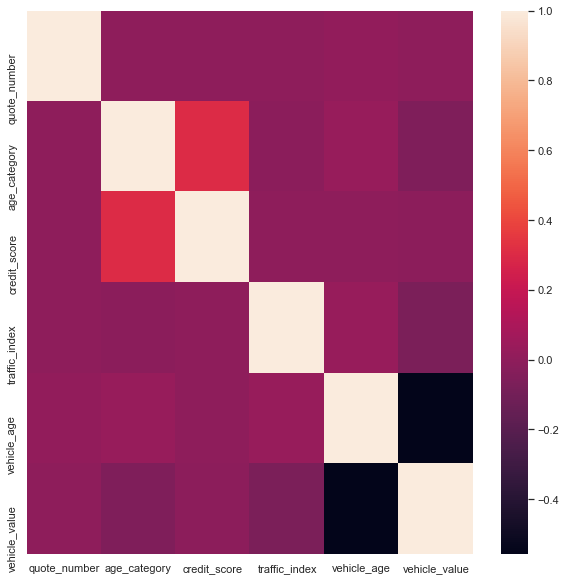

In [35]:
# plt.figure(figsize=(20, 20))
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(auto_potential_2018.corr())

## Claim amount evaluation:

- It looks like majority of the policies from 2017 do not have any claims/amount claimed on them

In [36]:
auto_policies_2017["claim_amount"].value_counts(normalize=True).round(4)*100

0.000000        83.4
55165.298400     0.0
1773.232348      0.0
492.274554       0.0
1088.516517      0.0
                ... 
1651.482059      0.0
1356.205876      0.0
7019.177879      0.0
281.938925       0.0
198.715688       0.0
Name: claim_amount, Length: 10026, dtype: float64

- Total claims amount distribution

Text(0, 0.5, 'Density \n')

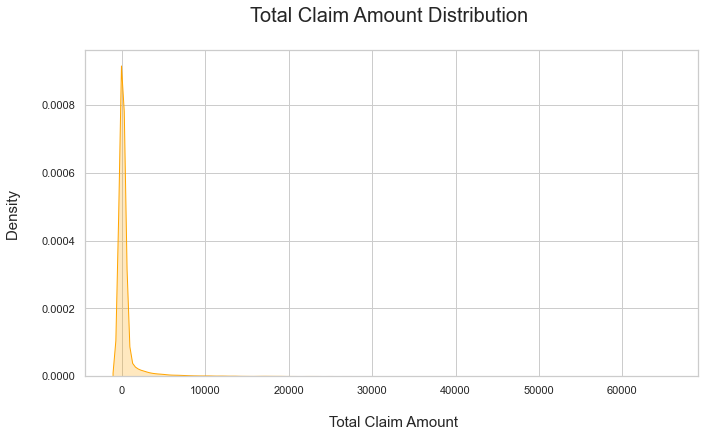

In [37]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.set_theme(style='whitegrid')
sns.kdeplot(auto_policies_2017["claim_amount"], shade = True, color="orange")\
            .set_title("Total Claim Amount Distribution \n",fontsize = 20)
plt.xlabel("\n Total Claim Amount", fontsize = 15)
plt.ylabel("Density \n", fontsize = 15)

In [38]:
low_risk_df = auto_policies_2017.loc[auto_policies_2017.claim_risk_cat == 'low_risk',:]
high_risk_df = auto_policies_2017.loc[auto_policies_2017.claim_risk_cat == 'high_risk',:]

- Showing total claim amount distribution by different risk categories

- Total claim amount 0 in low risk category

Text(0.5, 0, '\n Total Claim Amount')

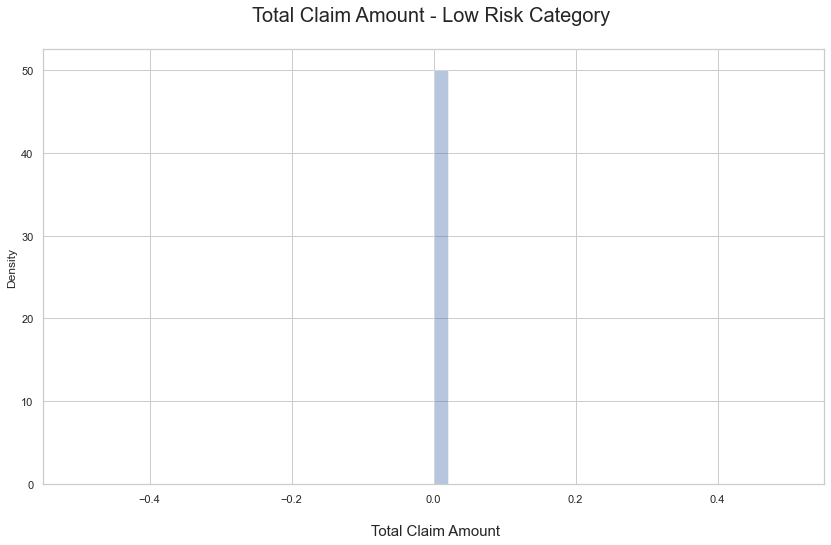

In [39]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(low_risk_df["claim_amount"],\
             kde=True, \
             kde_kws={"color": "b", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Total Claim Amount - Low Risk Category \n",fontsize = 20)
plt.xlabel("\n Total Claim Amount", fontsize = 15)

- Total claim amount non-zero and higher than 30k in some cases

Text(0.5, 0, '\n Total Claim Amount')

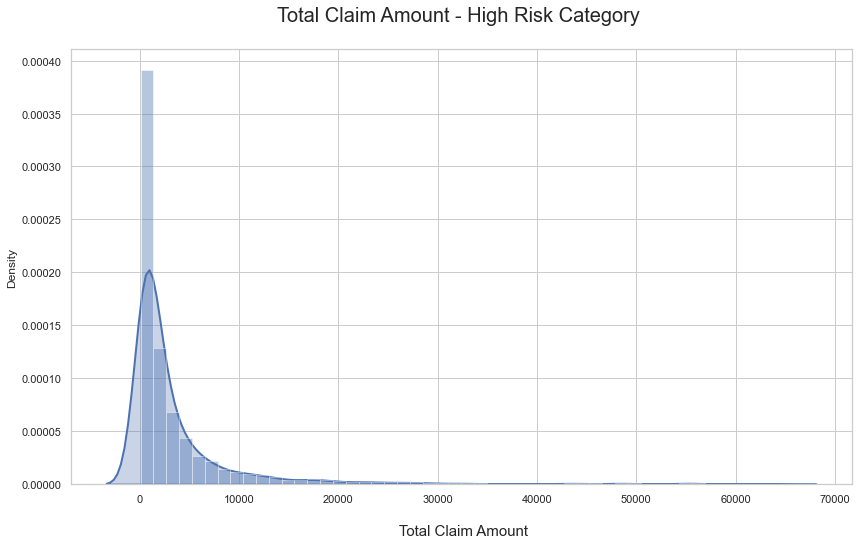

In [40]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(high_risk_df["claim_amount"],\
             kde=True, \
             kde_kws={"color": "b", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Total Claim Amount - High Risk Category \n",fontsize = 20)
plt.xlabel("\n Total Claim Amount", fontsize = 15)

## Number of claims evaluation

- This evaluation also confirms the above stated claim that majority of the policies from 2017 do not have any claims/amount claimed on them

In [41]:
num_claims_df = pd.DataFrame(auto_policies_2017["num_claims"].value_counts()\
                             .sort_values(ascending=False).reset_index())
num_claims_df.columns=['Number_of_Claims', 'Number_of_Policies']
num_claims_df

,Number_of_Claims,Number_of_Policies
0,0,50361
1,1,8032
2,2,1335
3,3,457
4,4,149
5,5,52


Text(0.5, 1.0, 'Number of Policies having different number of claims \n')

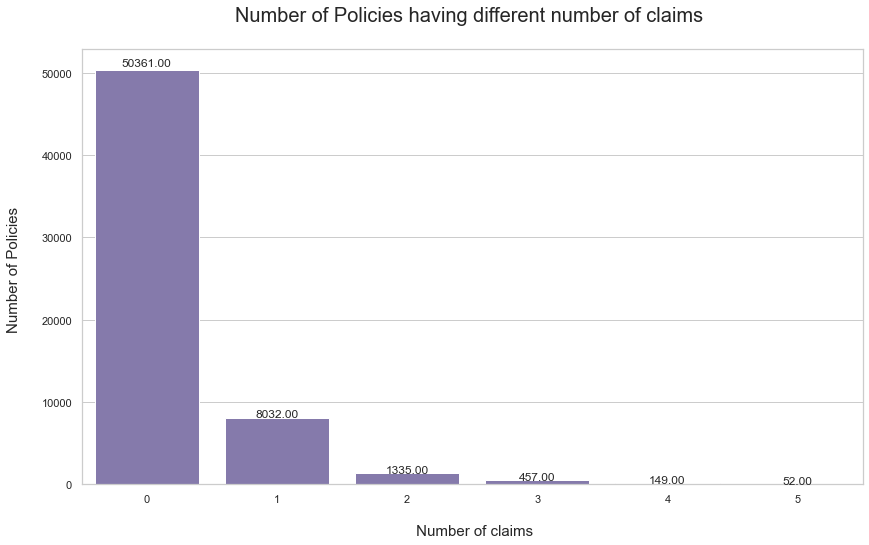

In [42]:
# plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(x="Number_of_Claims", y="Number_of_Policies",data=num_claims_df, color ="m")
show_values(plot, space=0.05)
plt.xlabel("\n Number of claims", fontsize = 15)
plt.ylabel("Number of Policies \n", fontsize = 15)
plt.title("Number of Policies having different number of claims \n", fontsize = 20)

### Customer gender evaluation:

- Females form the majority of policy holders in both current and potential policy holders

In [43]:
print("Gender distribution in current 2017 policies \n")
print(auto_policies_2017['gender'].value_counts())
print("*" * 40)
print(auto_policies_2017['gender'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("\n Gender distribution in potental 2018 policies \n")
print(auto_potential_2018['gender'].value_counts())
print("*" * 40)
print(auto_potential_2018['gender'].value_counts(normalize=True).round(4)*100)

Gender distribution in current 2017 policies 

F    34316
M    26070
Name: gender, dtype: int64
****************************************
F    56.83
M    43.17
Name: gender, dtype: float64
****************************************

 Gender distribution in potental 2018 policies 

F    4286
M    3176
Name: gender, dtype: int64
****************************************
F    57.44
M    42.56
Name: gender, dtype: float64


- The majority gender is different for high risk and low risk policies

In [44]:
print("Gender distribution in current 2017 policies: Low risk category \n")
print(low_risk_df['gender'].value_counts())
print("*" * 40)
print(low_risk_df['gender'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("Gender distribution in current potential 2018: High risk category \n")
print(high_risk_df['gender'].value_counts())
print("*" * 40)
print(high_risk_df['gender'].value_counts(normalize=True).round(4)*100)
print("*" * 40)

Gender distribution in current 2017 policies: Low risk category 

F    31062
M    19299
Name: gender, dtype: int64
****************************************
F    61.68
M    38.32
Name: gender, dtype: float64
****************************************
Gender distribution in current potential 2018: High risk category 

M    6771
F    3254
Name: gender, dtype: int64
****************************************
M    67.54
F    32.46
Name: gender, dtype: float64
****************************************


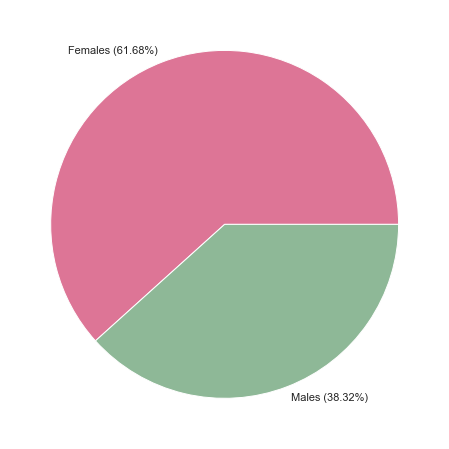

In [45]:
names = ['Females (61.68%)', 'Males (38.32%)']
# colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
colors = ['#DD7596', '#8EB897']
low_risk = low_risk_df['gender'].value_counts(normalize=True).round(4)*100
plt.pie(low_risk, labels=names, labeldistance=1.07,\
        wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white'},\
        colors=colors)
plt.show()

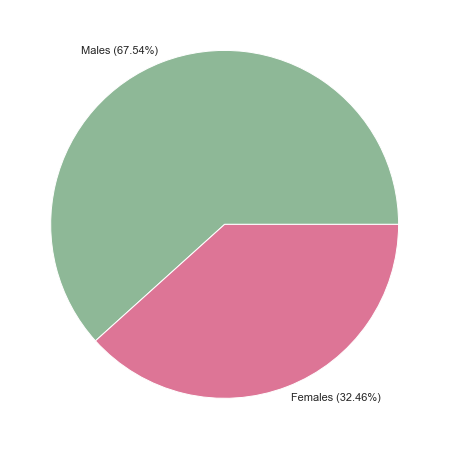

In [46]:
names = ['Males (67.54%)', 'Females (32.46%)']
# colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
colors = ['#8EB897','#DD7596']
low_risk = low_risk_df['gender'].value_counts(normalize=True).round(4)*100
plt.pie(low_risk, labels=names, labeldistance=1.07,\
        wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white'},\
        colors=colors)
plt.show()

In [47]:
# Creating dataframe that shows low risk policy counts per gender

gender_low = pd.DataFrame(low_risk_df['gender'].value_counts()\
                             .sort_values(ascending=False).reset_index())
gender_low.columns=['Gender', 'Number_of_Policies']

# Creating dataframe that shows high risk policy counts per gender

gender_high = pd.DataFrame(high_risk_df['gender'].value_counts()\
                             .sort_values(ascending=False).reset_index())
gender_high.columns=['Gender', 'Number_of_Policies']

Text(0.5, 1.0, 'Number of Policies per Gender in Low Risk Category \n')

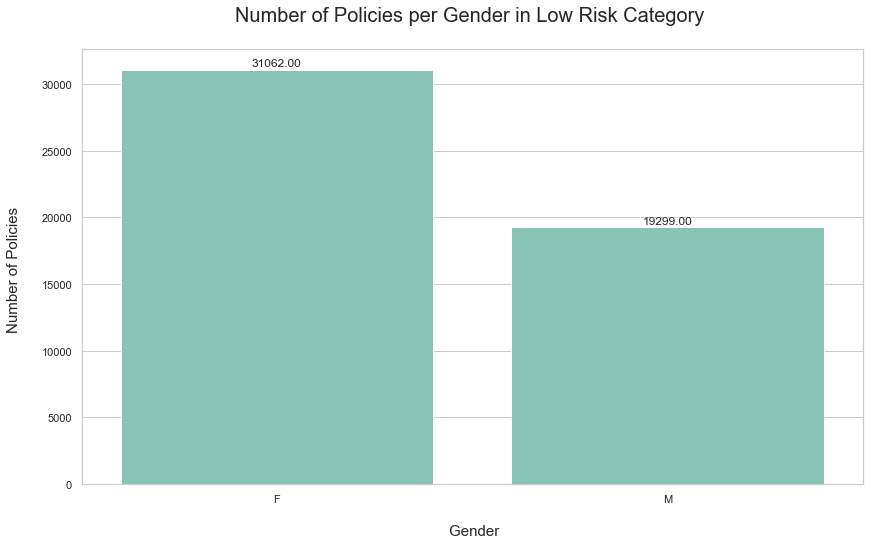

In [48]:
# Graphical representation

sns.set_theme(style='whitegrid')
plot = sns.barplot(x="Gender", y="Number_of_Policies",data=gender_low, color ="#7fcdbb")
show_values(plot, space=0.05)
plt.xlabel("\n Gender", fontsize = 15)
plt.ylabel("Number of Policies \n", fontsize = 15)
plt.title("Number of Policies per Gender in Low Risk Category \n", fontsize = 20)

Text(0.5, 1.0, 'Number of Policies per Gender in High Risk Category \n')

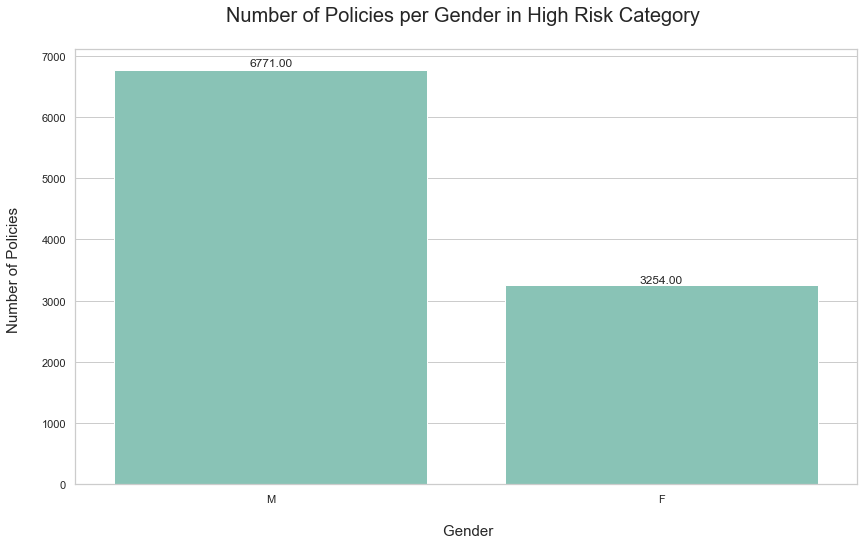

In [49]:
# Graphical representation

sns.set_theme(style='whitegrid')
plot = sns.barplot(x="Gender", y="Number_of_Policies",data=gender_high\
                   , color ="#7fcdbb")
show_values(plot, space=0.05)
plt.xlabel("\n Gender", fontsize = 15)
plt.ylabel("Number of Policies \n", fontsize = 15)
plt.title("Number of Policies per Gender in High Risk Category \n", fontsize = 20)

- In all policies claim amounts for different genders; subcategorized by different risk levels

<AxesSubplot:xlabel='gender', ylabel='claim_amount'>

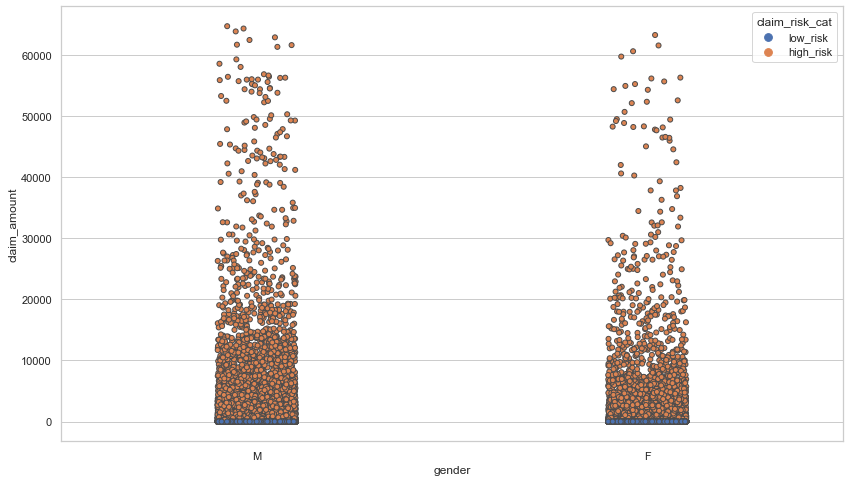

In [50]:
sns.stripplot(data=auto_policies_2017, x="gender", y="claim_amount", hue="claim_risk_cat", linewidth=1)

- Box plots for claim distribution: low and high risk

In [51]:
# sns.boxplot(data=low_risk_df, x='gender', y='claim_amount')

In [52]:
# sns.boxplot(data=high_risk_df, x='gender', y='claim_amount')

### Focusing on females (majority) - low risk

Text(0.5, 1.0, 'Percent Low Risk for Females in certain age categories \n')

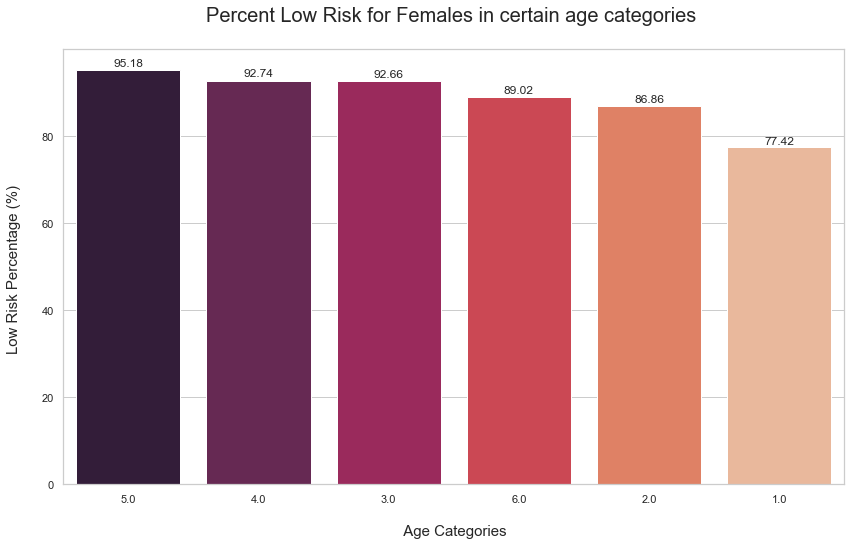

In [53]:
# For low risk policies females had high number of overall policies; listed below is further breakdown by age_category

low_fem_pol_count_1 = low_risk_df.loc[low_risk_df.gender == 'F',:]\
                    [['age_category','pol_number']].groupby('age_category')\
                   .agg(['count']).reset_index()
low_fem_pol_count_1.columns=['Age_Category', 'Number_of_Policies']
low_fem_pol_count_1 = low_fem_pol_count_1.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

high_fem_pol_count_1 = high_risk_df.loc[high_risk_df.gender == 'F',:]\
                    [['age_category','pol_number']].groupby('age_category')\
                   .agg(['count']).reset_index()
high_fem_pol_count_1.columns=['Age_Category', 'Number_of_Policies']
high_fem_pol_count_1 = high_fem_pol_count_1.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_fem_df_1 = low_fem_pol_count_1.merge(high_fem_pol_count_1, on='Age_Category')
high_fem_df_1.columns=['Age_Category', 'Low_Risk_Policy_Counts', 'High_Risk_Policy_Counts']
high_fem_df_1['Percent_Low_Risk'] = (high_fem_df_1['Low_Risk_Policy_Counts']/\
                                    (high_fem_df_1['Low_Risk_Policy_Counts'] +\
                                     high_fem_df_1['High_Risk_Policy_Counts'])*100).round(2)

# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_fem_df_1.groupby('Age_Category')['Percent_Low_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_fem_df_1, x='Age_Category', y='Percent_Low_Risk',\
                   order = my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xlabel("\n Age Categories", fontsize = 15)
plt.ylabel("Low Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent Low Risk for Females in certain age categories \n", fontsize = 20)

Text(0.5, 1.0, 'Percent Low Risk for Females in certain area categories \n')

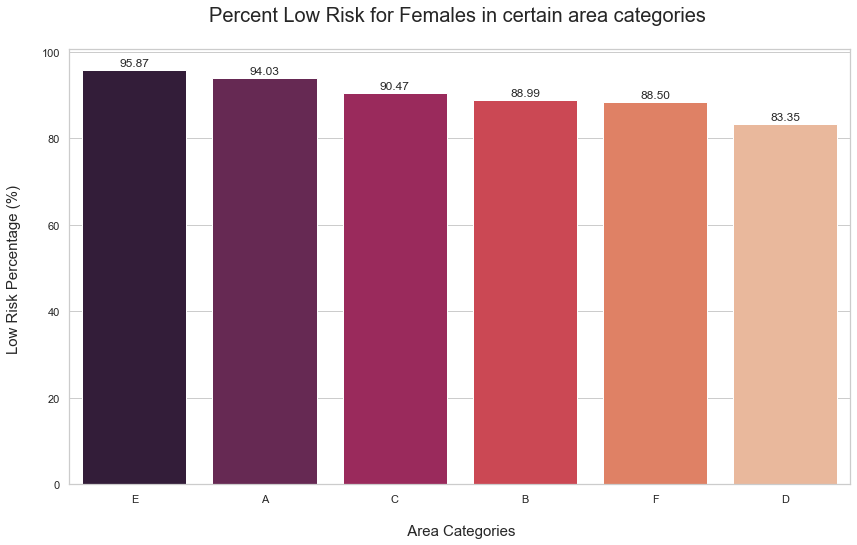

In [54]:
# For low risk policies, females had high number of overall policies; listed below is further breakdown by area

low_fem_pol_count_2 = low_risk_df.loc[low_risk_df.gender == 'F',:]\
                    [['area','pol_number']].groupby('area')\
                   .agg(['count']).reset_index()
low_fem_pol_count_2.columns=['Area_Category', 'Number_of_Policies']
low_fem_pol_count_2 = low_fem_pol_count_2.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

high_fem_pol_count_2 = high_risk_df.loc[high_risk_df.gender == 'F',:]\
                    [['area','pol_number']].groupby('area')\
                   .agg(['count']).reset_index()
high_fem_pol_count_2.columns=['Area_Category', 'Number_of_Policies']
high_fem_pol_count_2 = high_fem_pol_count_2.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_fem_df_2 = low_fem_pol_count_2.merge(high_fem_pol_count_2, on='Area_Category')
high_fem_df_2.columns=['Area_Category', 'Low_Risk_Policy_Counts', 'High_Risk_Policy_Counts']
high_fem_df_2['Percent_Low_Risk'] = (high_fem_df_2['Low_Risk_Policy_Counts']/\
                                    (high_fem_df_2['Low_Risk_Policy_Counts'] +\
                                     high_fem_df_2['High_Risk_Policy_Counts'])*100).round(2)

# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_fem_df_2.groupby('Area_Category')['Percent_Low_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_fem_df_2, x='Area_Category', y='Percent_Low_Risk',\
                   order = my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xlabel("\n Area Categories", fontsize = 15)
plt.ylabel("Low Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent Low Risk for Females in certain area categories \n", fontsize = 20)

Text(0.5, 1.0, 'Percent Low Risk for Females in certain Credit Score categories \n')

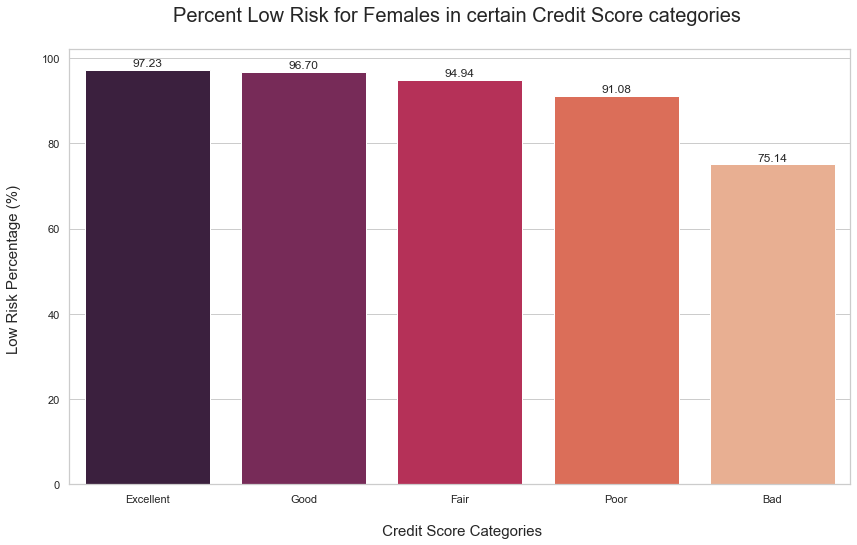

In [55]:
# For low risk policies, females had high number of overall policies; listed below is further breakdown by area

low_fem_pol_count_3 = low_risk_df.loc[low_risk_df.gender == 'F',:]\
                    [['credit_score_cat','pol_number']].groupby('credit_score_cat')\
                   .agg(['count']).reset_index()
low_fem_pol_count_3.columns=['Credit_Score_Category', 'Number_of_Policies']
low_fem_pol_count_3 = low_fem_pol_count_3.sort_values(by=['Number_of_Policies'], ascending=False)
low_fem_pol_count_3


# For high risk females and their policies: 

high_fem_pol_count_3 = high_risk_df.loc[high_risk_df.gender == 'F',:]\
                    [['credit_score_cat','pol_number']].groupby('credit_score_cat')\
                   .agg(['count']).reset_index()
high_fem_pol_count_3.columns=['Credit_Score_Category', 'Number_of_Policies']
high_fem_pol_count_3 = high_fem_pol_count_3.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_fem_df_3 = low_fem_pol_count_3.merge(high_fem_pol_count_3, on='Credit_Score_Category')
high_fem_df_3.columns=['Credit_Score_Category', 'Low_Risk_Policy_Counts', 'High_Risk_Policy_Counts']
high_fem_df_3['Percent_Low_Risk'] = (high_fem_df_3['Low_Risk_Policy_Counts']/\
                                    (high_fem_df_3['Low_Risk_Policy_Counts'] +\
                                     high_fem_df_3['High_Risk_Policy_Counts'])*100).round(2)
# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_fem_df_3.groupby('Credit_Score_Category')['Percent_Low_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_fem_df_3, x='Credit_Score_Category', y='Percent_Low_Risk',\
                   order = my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xlabel("\n Credit Score Categories", fontsize = 15)
plt.ylabel("Low Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent Low Risk for Females in certain Credit Score categories \n", fontsize = 20)

### Focusing on males (majority) - High Risk

Text(0.5, 1.0, 'Percent High Risk for Males in certain age categories \n')

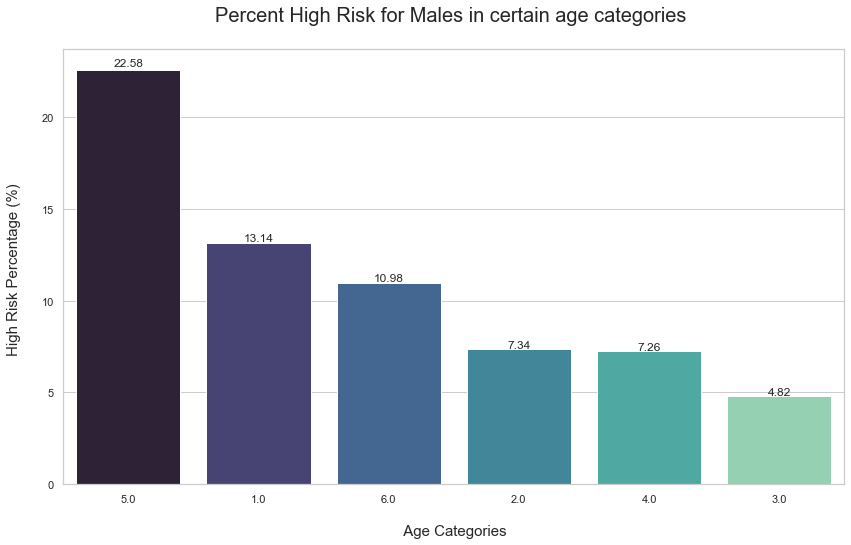

In [56]:
# For high risk policies males had high number of overall policies; listed below is further breakdown by age_category

high_male_pol_count_1 = high_risk_df.loc[high_risk_df.gender == 'M',:]\
                    [['age_category','pol_number']].groupby('age_category')\
                   .agg(['count']).reset_index()
high_male_pol_count_1.columns=['Age_Category', 'Number_of_Policies']
high_male_pol_count_1 = high_male_pol_count_1.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

low_male_pol_count_1 = low_risk_df.loc[low_risk_df.gender == 'M',:]\
                    [['age_category','pol_number']].groupby('age_category')\
                   .agg(['count']).reset_index()
low_male_pol_count_1.columns=['Age_Category', 'Number_of_Policies']
low_male_pol_count_1 = low_male_pol_count_1.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_male_df_1 = high_male_pol_count_1.merge(low_male_pol_count_1, on='Age_Category')
high_male_df_1.columns=['Age_Category', 'High_Risk_Policy_Counts', 'Low_Risk_Policy_Counts']
high_male_df_1['Percent_High_Risk'] = (high_fem_df_1['High_Risk_Policy_Counts']/\
                                     (high_fem_df_1['High_Risk_Policy_Counts'] +\
                                      high_fem_df_1['Low_Risk_Policy_Counts'])*100).round(2)

# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_male_df_1.groupby('Age_Category')['Percent_High_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_male_df_1, x='Age_Category', y='Percent_High_Risk',\
                   order = my_order, palette='mako')
show_values(plot,space=0.05)
plt.xlabel("\n Age Categories", fontsize = 15)
plt.ylabel("High Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent High Risk for Males in certain age categories \n", fontsize = 20)

Text(0.5, 1.0, 'Percent High Risk for Males in certain area categories \n')

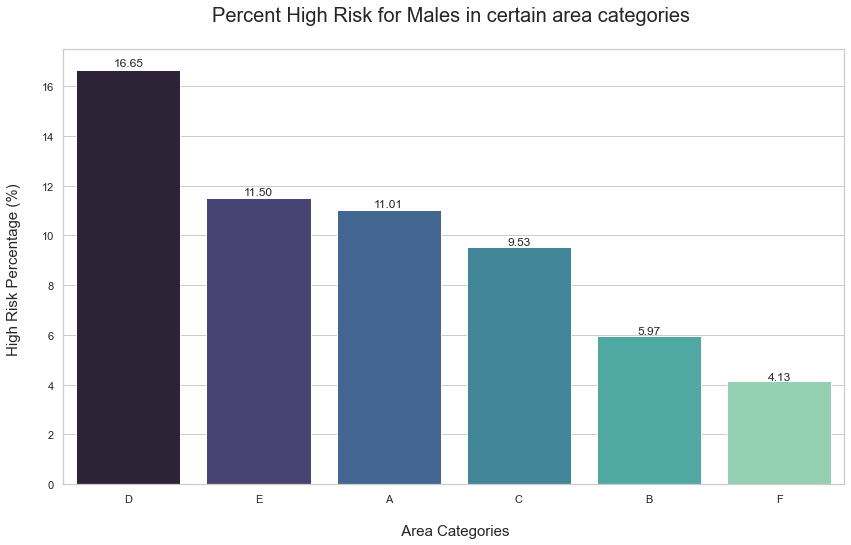

In [57]:
# For high risk policies males had high number of overall policies; listed below is further breakdown by area_category

high_male_pol_count_2 = high_risk_df.loc[high_risk_df.gender == 'M',:]\
                    [['area','pol_number']].groupby('area')\
                   .agg(['count']).reset_index()
high_male_pol_count_2.columns=['Area_Category', 'Number_of_Policies']
high_male_pol_count_2 = high_male_pol_count_2.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

low_male_pol_count_2 = low_risk_df.loc[low_risk_df.gender == 'M',:]\
                    [['area','pol_number']].groupby('area')\
                   .agg(['count']).reset_index()
low_male_pol_count_2.columns=['Area_Category', 'Number_of_Policies']
low_male_pol_count_2 = low_male_pol_count_2.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_male_df_2 = high_male_pol_count_2.merge(low_male_pol_count_2, on='Area_Category')
high_male_df_2.columns=['Area_Category', 'High_Risk_Policy_Counts', 'Low_Risk_Policy_Counts']
high_male_df_2['Percent_High_Risk'] = (high_fem_df_2['High_Risk_Policy_Counts']/\
                                     (high_fem_df_2['High_Risk_Policy_Counts'] +\
                                      high_fem_df_2['Low_Risk_Policy_Counts'])*100).round(2)

# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_male_df_2.groupby('Area_Category')['Percent_High_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_male_df_2, x='Area_Category', y='Percent_High_Risk',\
                   order = my_order, palette='mako')
show_values(plot,space=0.05)
plt.xlabel("\n Area Categories", fontsize = 15)
plt.ylabel("High Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent High Risk for Males in certain area categories \n", fontsize = 20)

Text(0.5, 1.0, 'Percent High Risk for Males in certain Credit Score categories \n')

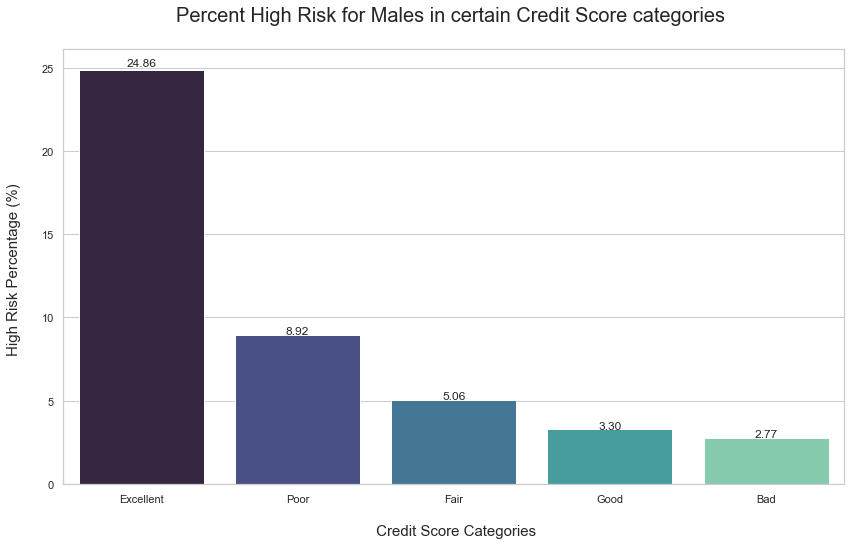

In [58]:
# For high risk policies males had high number of overall policies; listed below is further breakdown by area_category

high_male_pol_count_3 = high_risk_df.loc[high_risk_df.gender == 'M',:]\
                    [['credit_score_cat','pol_number']].groupby('credit_score_cat')\
                   .agg(['count']).reset_index()
high_male_pol_count_3.columns=['Credit_Score_Category', 'Number_of_Policies']
high_male_pol_count_3 = high_male_pol_count_3.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

low_male_pol_count_3 = low_risk_df.loc[low_risk_df.gender == 'M',:]\
                    [['credit_score_cat','pol_number']].groupby('credit_score_cat')\
                   .agg(['count']).reset_index()
low_male_pol_count_3.columns=['Credit_Score_Category', 'Number_of_Policies']
low_male_pol_count_3 = low_male_pol_count_3.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_male_df_3 = high_male_pol_count_3.merge(low_male_pol_count_3, on='Credit_Score_Category')
high_male_df_3.columns=['Credit_Score_Category', 'High_Risk_Policy_Counts', 'Low_Risk_Policy_Counts']
high_male_df_3['Percent_High_Risk'] = (high_fem_df_3['High_Risk_Policy_Counts']/\
                                     (high_fem_df_3['High_Risk_Policy_Counts'] +\
                                      high_fem_df_3['Low_Risk_Policy_Counts'])*100).round(2)

# Graphic Representation

sns.set_theme(style='whitegrid')
my_order = high_male_df_3.groupby('Credit_Score_Category')['Percent_High_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_male_df_3, x='Credit_Score_Category', y='Percent_High_Risk',\
                   order = my_order, palette='mako')
show_values(plot,space=0.05)
plt.xlabel("\n Credit Score Categories", fontsize = 15)
plt.ylabel("High Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent High Risk for Males in certain Credit Score categories \n", fontsize = 20)

### Age category evaluation

<AxesSubplot:xlabel='age_category', ylabel='claim_amount'>

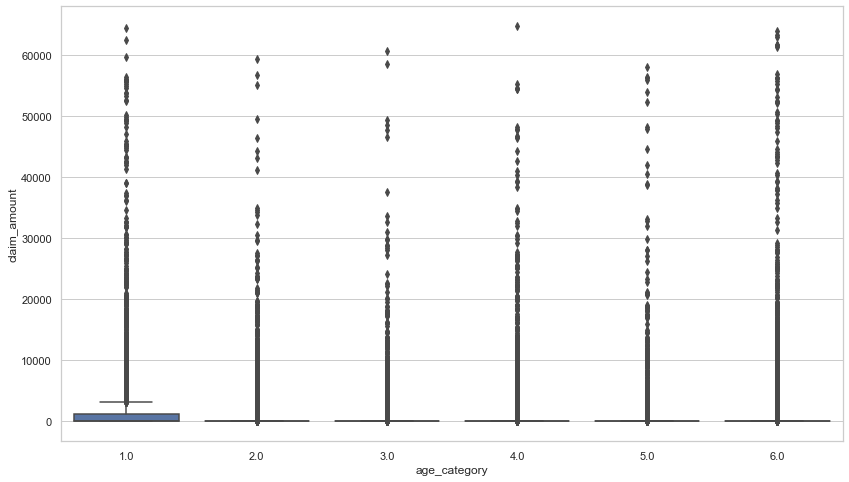

In [59]:
sns.boxplot(data=auto_policies_2017, x='age_category', y='claim_amount')

### Credit score evaluation

<AxesSubplot:xlabel='credit_score_cat', ylabel='claim_amount'>

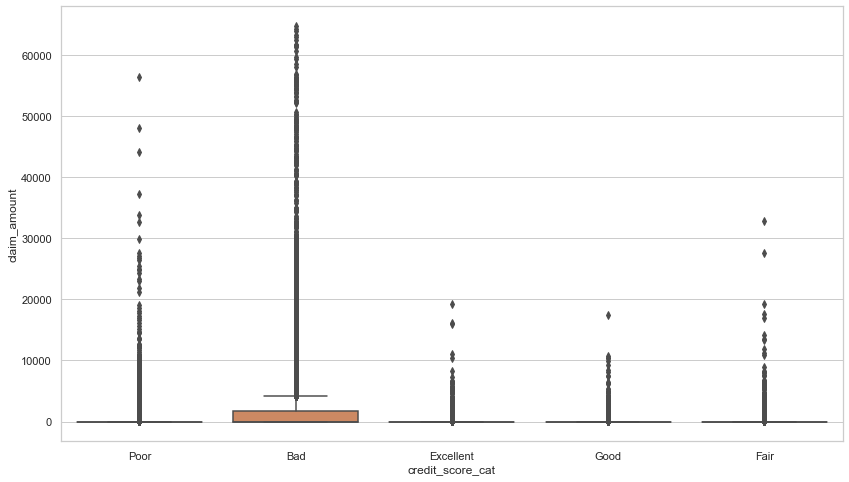

In [60]:
sns.boxplot(data=auto_policies_2017, x='credit_score_cat', y='claim_amount')

<AxesSubplot:xlabel='credit_score_cat', ylabel='claim_amount'>

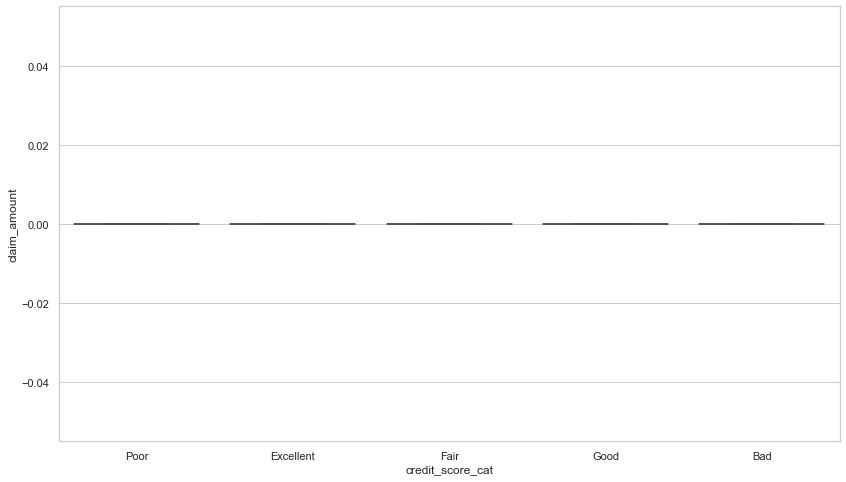

In [61]:
sns.boxplot(data=low_risk_df, x='credit_score_cat', y='claim_amount')

<AxesSubplot:xlabel='credit_score_cat', ylabel='claim_amount'>

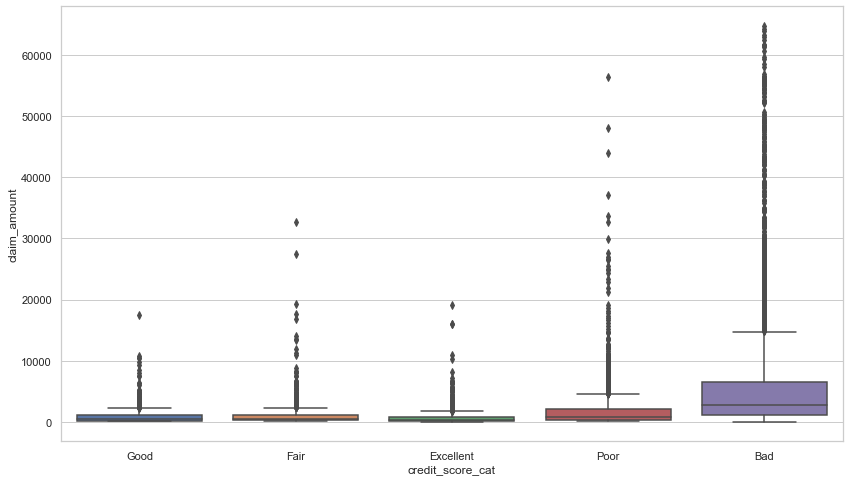

In [62]:
my_order = high_risk_df.groupby('credit_score_cat')['traffic_index']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=high_risk_df, x='credit_score_cat', y='claim_amount', order=my_order)

## Traffic index evaluation

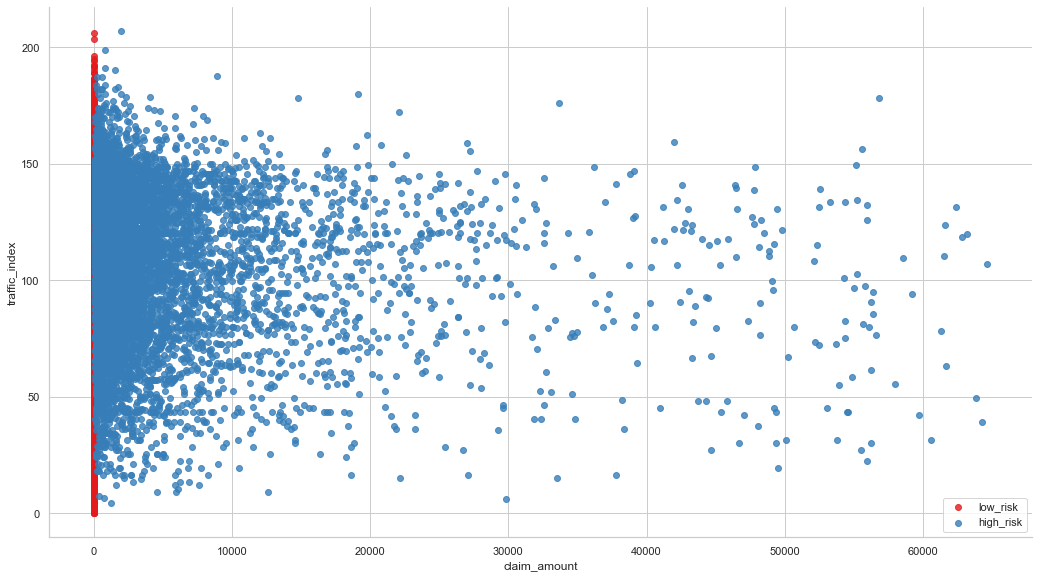

In [63]:
sns.lmplot("claim_amount", "traffic_index", auto_policies_2017,\
           height=8, aspect=1.8, palette="Set1",\
           fit_reg=False, hue='claim_risk_cat', legend=False)
plt.legend(loc='lower right')

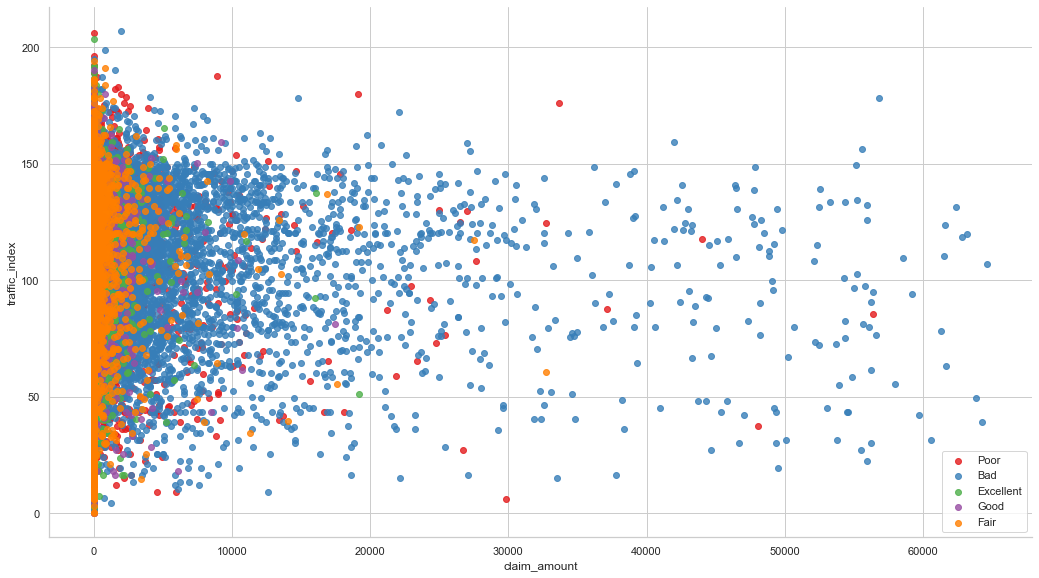

In [64]:
sns.lmplot("claim_amount", "traffic_index", auto_policies_2017,\
           height=8, aspect=1.8, palette="Set1",\
           fit_reg=False, hue='credit_score_cat', legend=False)
plt.legend(loc='lower right')

<AxesSubplot:xlabel='claim_risk_cat', ylabel='traffic_index'>

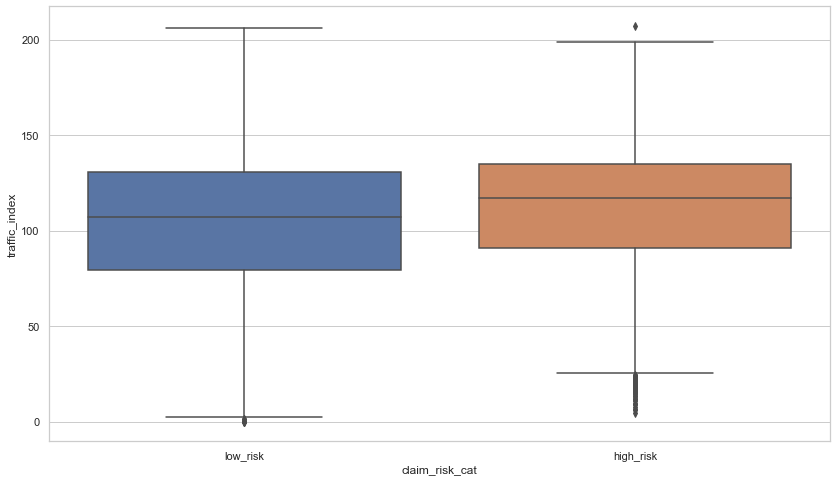

In [65]:
sns.boxplot(data=auto_policies_2017, x='claim_risk_cat', y='traffic_index')

<AxesSubplot:xlabel='credit_score_cat', ylabel='traffic_index'>

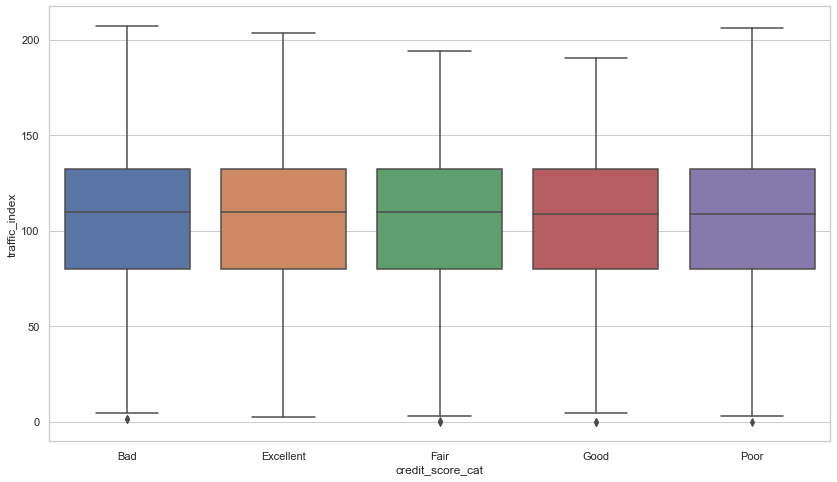

In [66]:
my_order = auto_policies_2017.groupby('credit_score_cat')['traffic_index']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=auto_policies_2017, x='credit_score_cat', y='traffic_index', order=my_order)

## Vehicle body evaluation

In [67]:
print("Vehicle body distribution in current 2017 policies \n")
print(auto_policies_2017['vehicle_body'].value_counts())
print("*" * 40)
print(auto_policies_2017['vehicle_body'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("\n Vehicle body distribution in potential 2018 policies \n")
print(auto_potential_2018['vehicle_body'].value_counts())
print("*" * 40)
print(auto_potential_2018['vehicle_body'].value_counts(normalize=True).round(4)*100)

Vehicle body distribution in current 2017 policies 

SEDAN    19796
HBACK    16793
STNWG    14486
UTE       4100
TRUCK     1561
HDTOP     1403
COUPE      697
PANVN      663
MIBUS      639
MCARA      111
CONVT       73
BUS         42
RDSTR       22
Name: vehicle_body, dtype: int64
****************************************
SEDAN    32.78
HBACK    27.81
STNWG    23.99
UTE       6.79
TRUCK     2.59
HDTOP     2.32
COUPE     1.15
PANVN     1.10
MIBUS     1.06
MCARA     0.18
CONVT     0.12
BUS       0.07
RDSTR     0.04
Name: vehicle_body, dtype: float64
****************************************

 Vehicle body distribution in potential 2018 policies 

SEDAN    2434
HBACK    2122
STNWG    1774
UTE       485
TRUCK     189
HDTOP     176
PANVN      89
COUPE      82
MIBUS      78
MCARA      15
CONVT       7
BUS         6
RDSTR       5
Name: vehicle_body, dtype: int64
****************************************
SEDAN    32.62
HBACK    28.44
STNWG    23.77
UTE       6.50
TRUCK     2.53
HDTOP     2.36
PANV

In [68]:
print("Vehicle body in current 2017 policies: Low risk category \n")
print(low_risk_df['vehicle_body'].value_counts())
print("*" * 40)
print(low_risk_df['vehicle_body'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("Vehicle body distribution in current potential 2018: High risk category \n")
print(high_risk_df['vehicle_body'].value_counts())
print("*" * 40)
print(high_risk_df['vehicle_body'].value_counts(normalize=True).round(4)*100)
print("*" * 40)

Vehicle body in current 2017 policies: Low risk category 

SEDAN    16910
HBACK    14280
STNWG    11913
UTE       3106
TRUCK     1154
HDTOP     1144
COUPE      572
MIBUS      557
PANVN      523
MCARA       89
CONVT       63
BUS         33
RDSTR       17
Name: vehicle_body, dtype: int64
****************************************
SEDAN    33.58
HBACK    28.36
STNWG    23.66
UTE       6.17
TRUCK     2.29
HDTOP     2.27
COUPE     1.14
MIBUS     1.11
PANVN     1.04
MCARA     0.18
CONVT     0.13
BUS       0.07
RDSTR     0.03
Name: vehicle_body, dtype: float64
****************************************
Vehicle body distribution in current potential 2018: High risk category 

SEDAN    2886
STNWG    2573
HBACK    2513
UTE       994
TRUCK     407
HDTOP     259
PANVN     140
COUPE     125
MIBUS      82
MCARA      22
CONVT      10
BUS         9
RDSTR       5
Name: vehicle_body, dtype: int64
****************************************
SEDAN    28.79
STNWG    25.67
HBACK    25.07
UTE       9.92
TRUCK     4

<AxesSubplot:xlabel='claim_amount', ylabel='vehicle_body'>

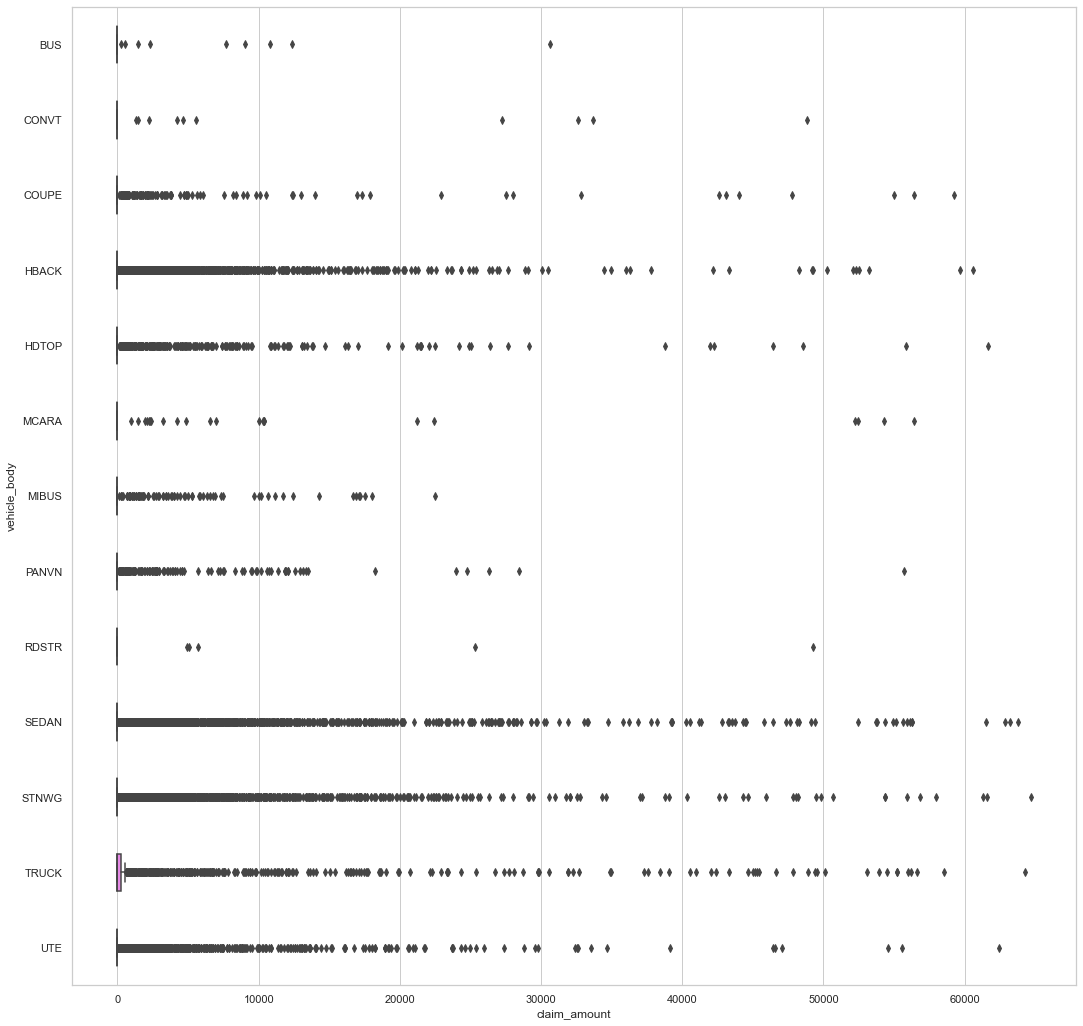

In [69]:
plt.figure(figsize=(18, 18))
my_order = auto_policies_2017.groupby('vehicle_body')['claim_amount']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=auto_policies_2017, x='claim_amount', y='vehicle_body',order=my_order, width=0.5)

## Vehicle age evaluation

In [70]:
print("Vehicle age distribution in current 2017 policies \n")
print(auto_policies_2017['vehicle_age'].value_counts())
print("*" * 40)
print(auto_policies_2017['vehicle_age'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("\n Vehicle age distribution in potential 2018 policies \n")
print(auto_potential_2018['vehicle_age'].value_counts())
print("*" * 40)
print(auto_potential_2018['vehicle_age'].value_counts(normalize=True).round(4)*100)

Vehicle age distribution in current 2017 policies 

3    17827
4    16890
2    14757
1    10912
Name: vehicle_age, dtype: int64
****************************************
3    29.52
4    27.97
2    24.44
1    18.07
Name: vehicle_age, dtype: float64
****************************************

 Vehicle age distribution in potential 2018 policies 

3    2237
4    2058
2    1830
1    1337
Name: vehicle_age, dtype: int64
****************************************
3    29.98
4    27.58
2    24.52
1    17.92
Name: vehicle_age, dtype: float64


In [71]:
print("Vehicle age distribution in current 2017 policies: Low risk category \n")
print(low_risk_df['vehicle_age'].value_counts())
print("*" * 40)
print(low_risk_df['vehicle_age'].value_counts(normalize=True).round(4)*100)
print("*" * 40)
print("Vehicle age distribution in current potential 2018: High risk category \n")
print(high_risk_df['vehicle_age'].value_counts())
print("*" * 40)
print(high_risk_df['vehicle_age'].value_counts(normalize=True).round(4)*100)
print("*" * 40)

Vehicle age distribution in current 2017 policies: Low risk category 

3    14982
4    13855
2    12407
1     9117
Name: vehicle_age, dtype: int64
****************************************
3    29.75
4    27.51
2    24.64
1    18.10
Name: vehicle_age, dtype: float64
****************************************
Vehicle age distribution in current potential 2018: High risk category 

4    3035
3    2845
2    2350
1    1795
Name: vehicle_age, dtype: int64
****************************************
4    30.27
3    28.38
2    23.44
1    17.91
Name: vehicle_age, dtype: float64
****************************************


### Category 3 (majority) - Low Risk

Text(0.5, 1.0, 'Percent Low Risk for Age 3 category in certain Vehicle Body categories \n')

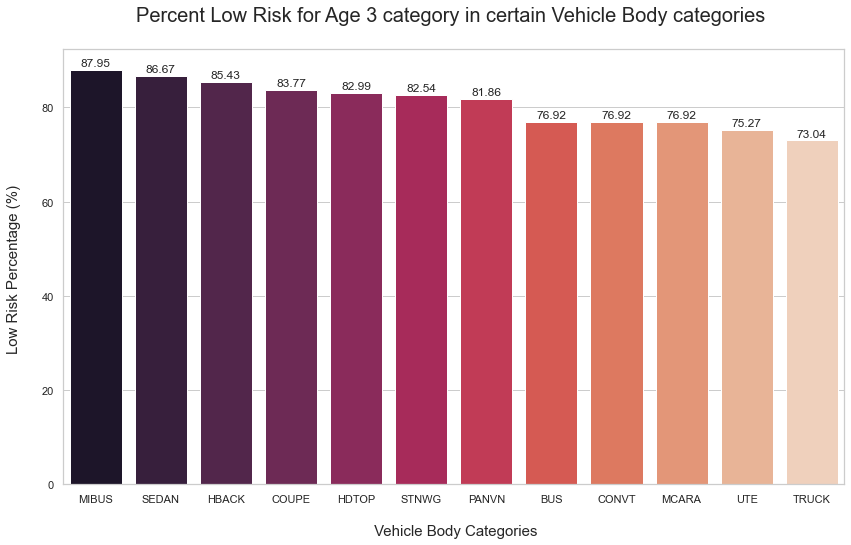

In [72]:
# For low risk policies Age Category 3 had high number of overall policies;
# listed below is further breakdown by vehicle_body

low_cat3_pol_cnt_1 = low_risk_df.loc[low_risk_df.vehicle_age == 3,:]\
                    [['vehicle_body','pol_number']].groupby('vehicle_body')\
                   .agg(['count']).reset_index()
low_cat3_pol_cnt_1.columns=['Vehicle_Body', 'Number_of_Policies']
low_cat3_pol_cnt_1 = low_cat3_pol_cnt_1.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

high_cat3_pol_cnt_1 = high_risk_df.loc[high_risk_df.vehicle_age == 3,:]\
                    [['vehicle_body','pol_number']].groupby('vehicle_body')\
                   .agg(['count']).reset_index()
high_cat3_pol_cnt_1.columns=['Vehicle_Body', 'Number_of_Policies']
high_cat3_pol_cnt_1 = high_cat3_pol_cnt_1.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_cat3_df_1 = low_cat3_pol_cnt_1.merge(high_cat3_pol_cnt_1, on='Vehicle_Body')
high_cat3_df_1.columns=['Vehicle_Body', 'Low_Risk_Policy_Counts', 'High_Risk_Policy_Counts']
high_cat3_df_1['Percent_Low_Risk'] = (high_cat3_df_1['Low_Risk_Policy_Counts']/\
                                     (high_cat3_df_1['Low_Risk_Policy_Counts'] +\
                                     high_cat3_df_1['High_Risk_Policy_Counts'])*100).round(2)

# Graphic visualization:

sns.set_theme(style='whitegrid')
my_order = high_cat3_df_1.groupby('Vehicle_Body')['Percent_Low_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_cat3_df_1, x='Vehicle_Body', y='Percent_Low_Risk',\
                   order = my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xlabel("\n Vehicle Body Categories", fontsize = 15)
plt.ylabel("Low Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent Low Risk for Age 3 category in certain Vehicle Body categories \n", fontsize = 20)

### Category 4 (majority) - High Risk

Text(0.5, 1.0, 'Percent High Risk for Age 4 category in certain Vehicle Body categories \n')

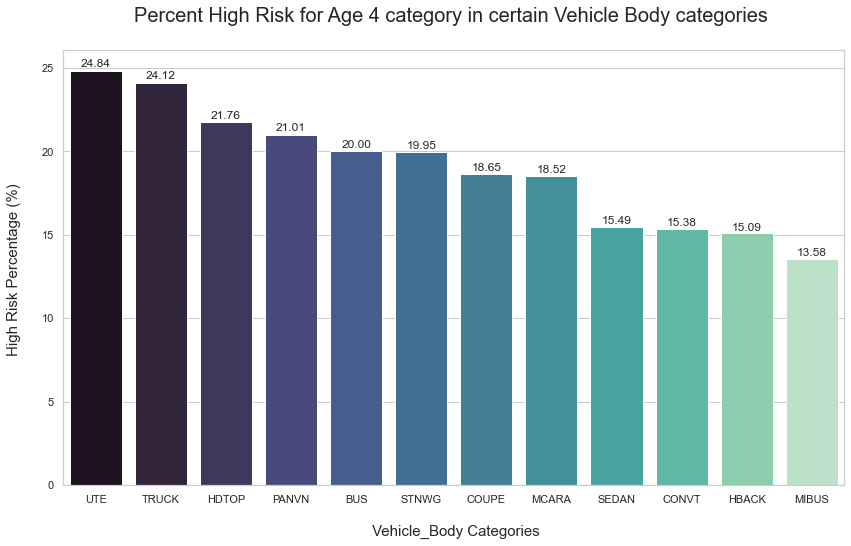

In [73]:
# For high risk policies Age Category 4 had high number of overall policies;
# listed below is further breakdown by vehicle_body

high_cat3_pol_cnt_2 = high_risk_df.loc[high_risk_df.vehicle_age == 4,:]\
                    [['vehicle_body','pol_number']].groupby('vehicle_body')\
                   .agg(['count']).reset_index()
high_cat3_pol_cnt_2.columns=['Vehicle_Body', 'Number_of_Policies']
high_cat3_pol_cnt_2 = high_cat3_pol_cnt_2.sort_values(by=['Number_of_Policies'], ascending=False)

# For high risk females and their policies: 

low_cat3_pol_cnt_2 = low_risk_df.loc[low_risk_df.vehicle_age == 4,:]\
                    [['vehicle_body','pol_number']].groupby('vehicle_body')\
                   .agg(['count']).reset_index()
low_cat3_pol_cnt_2.columns=['Vehicle_Body', 'Number_of_Policies']
low_cat3_pol_cnt_2 = low_cat3_pol_cnt_2.sort_values(by=['Number_of_Policies'], ascending=False)

# Creating a combined table

high_cat3_df_1 = high_cat3_pol_cnt_2.merge(low_cat3_pol_cnt_2, on='Vehicle_Body')
high_cat3_df_1.columns=['Vehicle_Body', 'High_Risk_Policy_Counts', 'Low_Risk_Policy_Counts']
high_cat3_df_1['Percent_High_Risk'] = (high_cat3_df_1['High_Risk_Policy_Counts']/\
                                     (high_cat3_df_1['High_Risk_Policy_Counts'] +\
                                     high_cat3_df_1['Low_Risk_Policy_Counts'])*100).round(2)

# Graphic Representation

sns.set_theme(style='whitegrid')
my_order = high_cat3_df_1.groupby('Vehicle_Body')['Percent_High_Risk']\
           .median().sort_values(ascending=False).index
plot = sns.barplot(data=high_cat3_df_1, x='Vehicle_Body', y='Percent_High_Risk',\
                   order = my_order, palette='mako')
show_values(plot,space=0.05)
plt.xlabel("\n Vehicle_Body Categories", fontsize = 15)
plt.ylabel("High Risk Percentage (%) \n", fontsize = 15)
plt.title("Percent High Risk for Age 4 category in certain Vehicle Body categories \n", fontsize = 20)

## Vehicle value evaluation

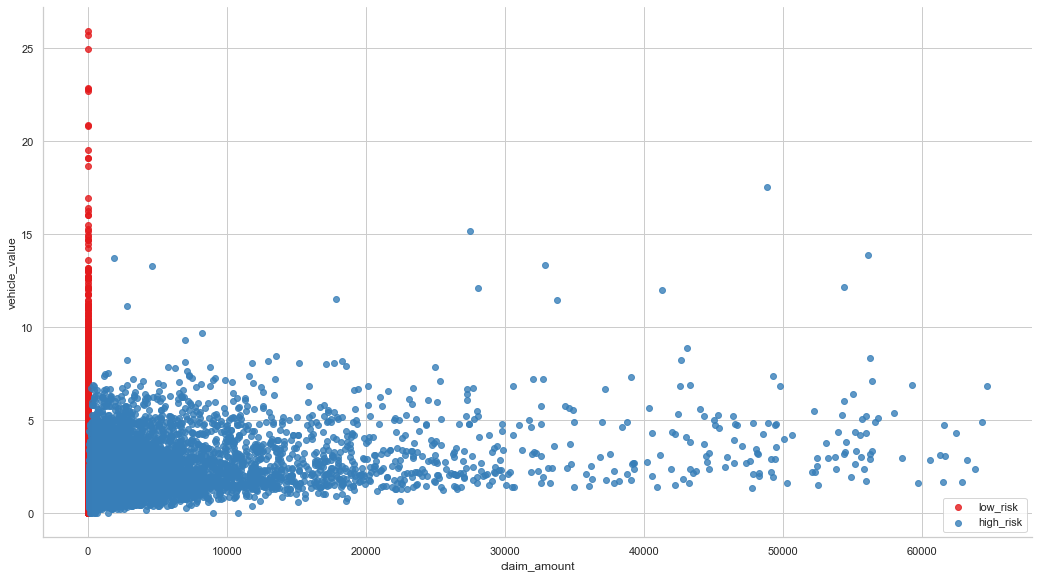

In [74]:
sns.lmplot("claim_amount", "vehicle_value", auto_policies_2017,\
           height=8, aspect=1.8, palette="Set1",\
           fit_reg=False, hue='claim_risk_cat', legend=False)
plt.legend(loc='lower right')

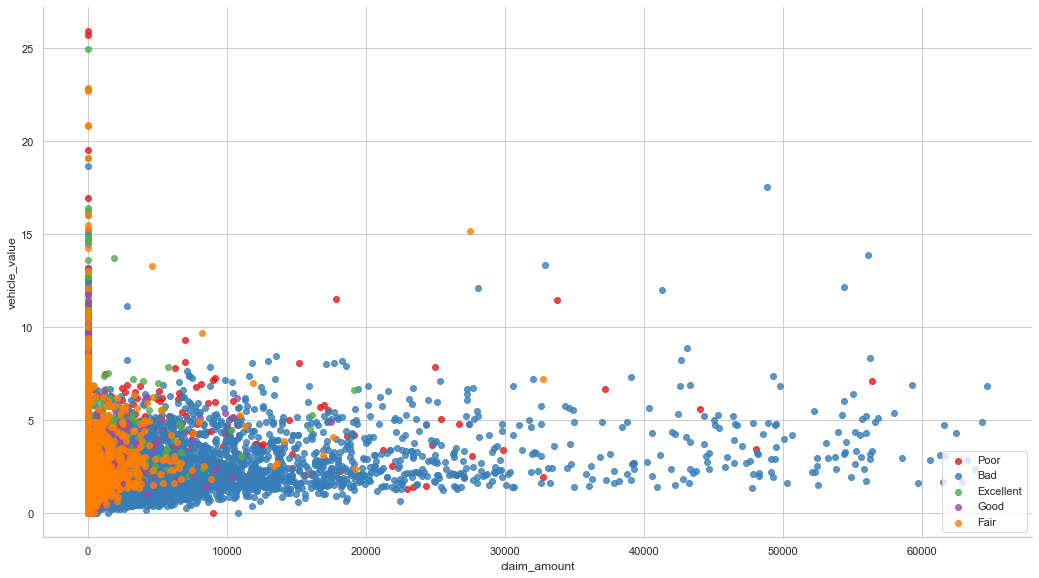

In [75]:
sns.lmplot("claim_amount", "vehicle_value", auto_policies_2017,\
           height=8, aspect=1.8, palette="Set1",\
           fit_reg=False, hue='credit_score_cat', legend=False)
plt.legend(loc='lower right')

<AxesSubplot:xlabel='claim_risk_cat', ylabel='vehicle_value'>

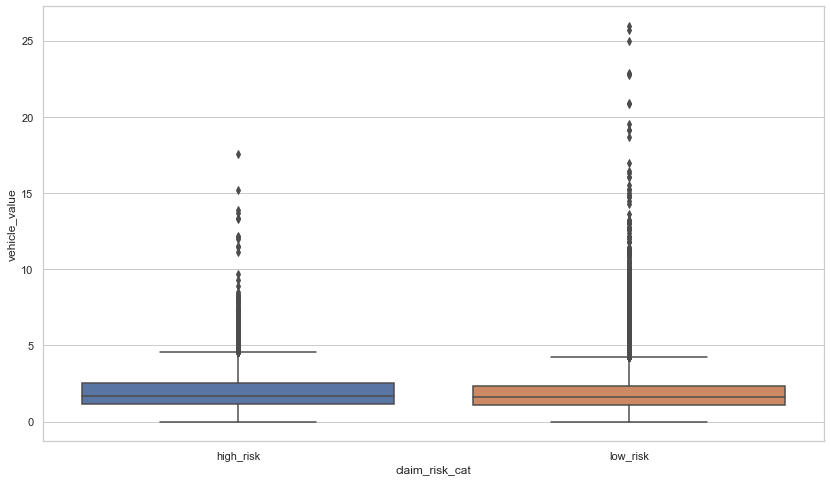

In [76]:
my_order = auto_policies_2017.groupby('claim_risk_cat')['vehicle_value']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=auto_policies_2017, x='claim_risk_cat', y='vehicle_value', order=my_order)

<AxesSubplot:xlabel='credit_score_cat', ylabel='vehicle_value'>

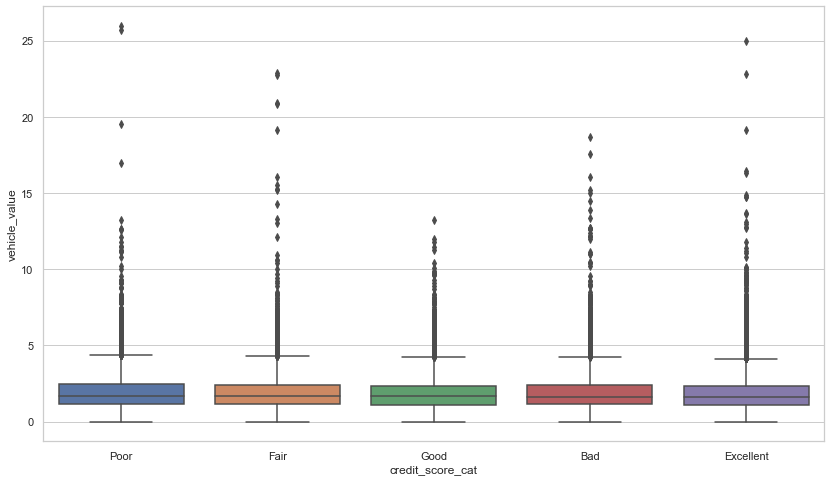

In [77]:
my_order = auto_policies_2017.groupby('credit_score_cat')['vehicle_value']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=auto_policies_2017, x='credit_score_cat', y='vehicle_value', order=my_order)

## Dropping columns that will not be used in ML model:

- Current 2017 policies

In [78]:
auto_policies_2017.drop(['pol_number', 'num_claims','claim_amount',\
                         'annual_premium', 'cost_per_claim'], axis=1, inplace=True)

- Potential 2018 customers

In [79]:
auto_potential_2018.drop(['quote_number'], axis=1, inplace=True)

## Label encoding categorical features

In [80]:
label_encode_2017(auto_policies_2017)

In [81]:
label_encode_2018(auto_potential_2018)

## Saving clean files:

In [82]:
# auto_policies_2017.to_csv('clean_train.csv')
# auto_potential_2018.to_csv('clean_test.csv')